In [1]:
import numpy as np
import pandas as pd
import stan
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append('/mrhome/amingk/Documents/7TPD/ActStimRL')
from Madule import utils
import arviz as az

In [12]:
# List of subjects
subList = ['sub-004', 'sub-010', 'sub-012', 'sub-025', 'sub-026', 'sub-029', 'sub-030',
           'sub-033', 'sub-034', 'sub-036', 'sub-040', 'sub-041', 'sub-042', 'sub-044', 
           'sub-045', 'sub-047', 'sub-048', 'sub-052', 'sub-054', 'sub-056', 'sub-059', 
           'sub-060', 'sub-064', 'sub-065', 'sub-067', 'sub-069', 'sub-070', 'sub-071', 
           'sub-074', 'sub-075', 'sub-076', 'sub-077', 'sub-078', 'sub-079', 'sub-080', 
           'sub-081', 'sub-082', 'sub-083', 'sub-085', 'sub-087', 'sub-088', 'sub-089', 
           'sub-090', 'sub-092', 'sub-108', 'sub-109']
# list of model fits for all participant
fit = []
# read all conditions and sessions data for a specifit participant
session =2
reverse =14
condition ='Clr'
for sub in subList:
    # Main directory of the subject
    subMainDirec = '/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/originalfMRIbehFiles/'
    # The adrees name of pickle file
    pickelDir = subMainDirec + sub +'/model/indv/' + sub +'_cond-' + str(condition) + '_sess-' + str(session) + '_env-' + str(reverse) + '_StanRL_simple_normal.pkl'
    """Loading the pickle file of model fit from the subject directory"""
    loadPkl = utils.load_pickle(load_path=pickelDir)
    fit.append(loadPkl['fit'])                                                                                                                    

In [13]:
#az.summary(fit[0])[0:5]

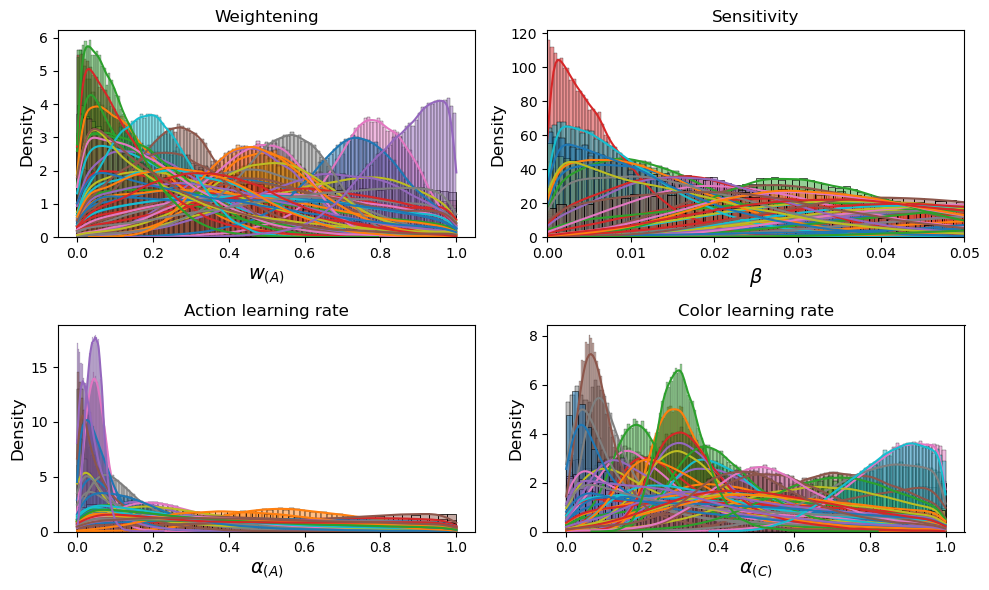

In [17]:
# Figure of model fit results in two column and two rows
fig = plt.figure(figsize=(10, 6), tight_layout=True)
rows = 2
columns = 2

# Weghtening
fig.add_subplot(rows, columns, 1)
for i in range(len(fit)):
    sns.histplot(fit[i]["weightAct"].flatten(), kde=True, stat='density')
    plt.title('Weightening', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.xlabel('$w_{(A)}$', fontsize=14)
 
 
# Sensitivity
fig.add_subplot(rows, columns, 2)
for i in range(len(fit)):
    sns.histplot(fit[i]["sensitivity"].flatten(), kde=True, stat='density')
    plt.title('Sensitivity', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.xlabel(r'$\beta$', fontsize=14)
    plt.xlim(0, .05)
    
# Action learning rate
fig.add_subplot(rows, columns, 3)
for i in range(len(fit)):
    sns.histplot(fit[i]["alphaAct"].flatten(), kde=True, stat='density')
    plt.title('Action learning rate', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.xlabel(r'$\alpha_{(A)}$', fontsize=14)
    
# Color learning rate
fig.add_subplot(rows, columns, 4)
for i in range(len(fit)):
    sns.histplot(fit[i]["alphaClr"].flatten(), kde=True, stat='density')
    plt.title('Color learning rate', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.xlabel(r'$\alpha_{(C)}$', fontsize=14)

# Main directory of the subject
subMainDirec = '/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/originalfMRIbehFiles/'
# Save figure of parameter distribution 
fig.savefig(subMainDirec + '/Model_secondOrder/indv/allIndv-cond-' + str(condition) + '_sess-' + str(session) + '_env-' + str(reverse) + '_StanRL_simple_normal.png', dpi=300)

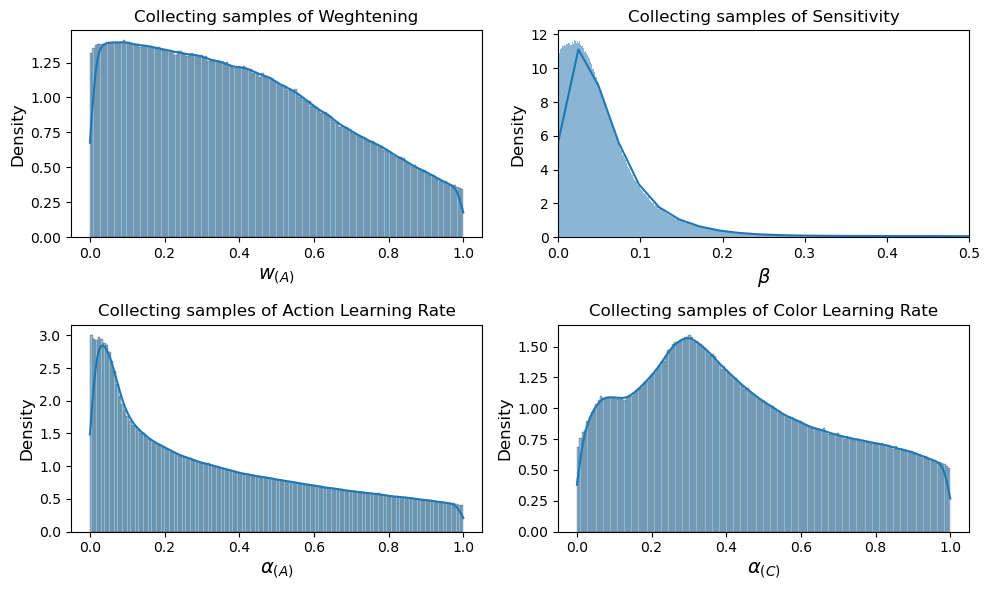

In [16]:

# Figure of model fit results in two column and two rows
fig = plt.figure(figsize=(10, 6), tight_layout=True)
rows = 2
columns = 2

# Exctracting and Collecting all samples of Weghtening across participant
collectWeightAct = np.zeros(0)
for i in range(len(fit)):
    collectWeightAct = np.concatenate([collectWeightAct, fit[i]["weightAct"].flatten()])

fig.add_subplot(rows, columns, 1)
sns.histplot(collectWeightAct, kde=True, stat='density')
plt.title('Collecting samples of Weghtening', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlabel('$w_{(A)}$', fontsize=14)

# Exctracting and Collecting all samples of Sensitivity across participant
collectBeta = np.zeros(0)
for i in range(len(fit)):
    collectBeta = np.concatenate([collectBeta, fit[i]["sensitivity"].flatten()])

fig.add_subplot(rows, columns, 2)
sns.histplot(collectBeta, kde=True, stat='density')
plt.title('Collecting samples of Sensitivity', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlabel(r'$\beta$', fontsize=14)
plt.xlim(0, .5)

# Exctracting and Collecting all samples of Action Learning Rate across participant
collectalphaAct = np.zeros(0)
for i in range(len(fit)):
    collectalphaAct = np.concatenate([collectalphaAct, fit[i]["alphaAct"].flatten()])

fig.add_subplot(rows, columns, 3)
sns.histplot(collectalphaAct, kde=True, stat='density')
plt.title('Collecting samples of Action Learning Rate', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlabel(r'$ \alpha_{(A)} $', fontsize=14)


# Exctracting and Collecting all samples of Color Learning Rate across participant
collectalphaClr = np.zeros(0)
for i in range(len(fit)):
    collectalphaClr = np.concatenate([collectalphaClr, fit[i]["alphaClr"].flatten()])

fig.add_subplot(rows, columns, 4)
sns.histplot(collectalphaClr, kde=True, stat='density')
plt.title('Collecting samples of Color Learning Rate', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.xlabel(r'$ \alpha_{(C)} $', fontsize=14)

plt.subplots_adjust(wspace=10.)

# Main directory of the subject
subMainDirec = '/mnt/projects/7TPD/bids/derivatives/fMRI_DA/data_BehModel/originalfMRIbehFiles/'
# Save figure of parameter distribution 
fig.savefig(subMainDirec + '/Model_secondOrder/indv/collectSamplesIndv-cond-' + str(condition) + '_sess-' + str(session) + '_env-' + str(reverse) + '_StanRL_simple_normal.png', dpi=300)